In [ ]:
import tensorflow as tf


In [ ]:
!pip install tensorflow


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from emnist import extract_training_samples, extract_test_samples
import matplotlib.pyplot as p

2024-10-22 14:36:17.786931: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-22 14:36:17.954722: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-10-22 14:36:17.954746: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-10-22 14:36:18.783207: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [3]:
# Normalize the data to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [4]:
# Check the shape of the data
print('Training data shape:', X_train.shape)
print('Training labels shape:', y_train.shape)
print('Test data shape:', X_test.shape)
print('Test labels shape:', y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


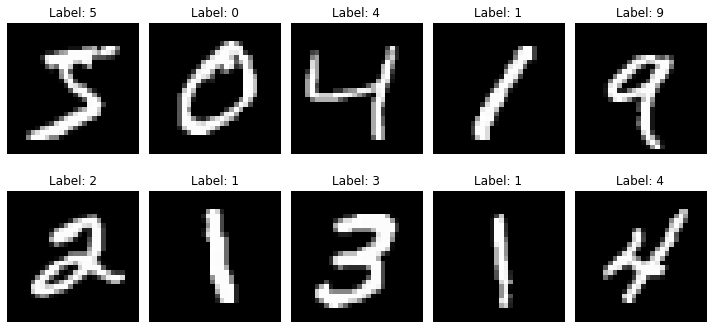

In [5]:
import matplotlib.pyplot as plt

# Display the first 10 images from the training set
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),   # Input layer
    tf.keras.layers.Dense(128, activation='relu'),    # First hidden layer
    tf.keras.layers.Dense(64, activation='relu'),     # Second hidden layer
    tf.keras.layers.Dense(32, activation='relu'),      # Third hidden layer
    tf.keras.layers.Dense(16, activation='relu'),      # Fourth hidden layer
    tf.keras.layers.Dense(8, activation='relu'),       # Fifth hidden layer
    tf.keras.layers.Dense(10, activation='softmax')    # Output layer
])


In [20]:

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
# Train the model
model.fit(X_train, y_train, epochs=10)


Epoch 1/10
  27/1875 [..............................] - ETA: 7s - loss: 0.0416 - accuracy: 0.9896

2024-10-22 14:52:21.471564: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 7s 4ms/step - loss: 0.0480 - accuracy: 0.9850
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0404 - accuracy: 0.9875
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0336 - accuracy: 0.9896
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0308 - accuracy: 0.9903
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0283 - accuracy: 0.9908
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0267 - accuracy: 0.9917
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0223 - accuracy: 0.9927
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0223 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0199 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0187 - accura

In [25]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1034 - accuracy: 0.9784
Test accuracy: 0.9783999919891357


1/1 [==============================] - 0s 27ms/step
Predictions: [[1.0000000e+00 1.9874220e-11 8.6008733e-10 1.9888371e-14 2.9295354e-16
  2.7344609e-14 5.0254883e-12 3.3228473e-09 8.1787138e-13 1.0426671e-12]]
Predicted Label: 0


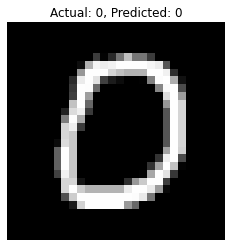

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Take a sample image from the test set (e.g., the first image)
sample_index = 10
sample_image = X_test[sample_index]
sample_label = y_test[sample_index]

# Reshape the image for the model (28, 28) -> (1, 28, 28)
sample_image = sample_image.reshape(1, 28, 28)

# Predict the class
predictions = model.predict(sample_image)
predicted_label = np.argmax(predictions)

# Predict the class
predictions = model.predict(sample_image)
print("Predictions:", predictions)  # View the raw output probabilities

predicted_label = np.argmax(predictions)
print("Predicted Label:", predicted_label)  # View the predicted class index

# Display the sample image and prediction
plt.imshow(X_test[sample_index], cmap='gray')
plt.title(f"Actual: {sample_label}, Predicted: {predicted_label}")
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 22ms/step
Image 0: Predictions: [[1.4103613e-07 5.2800728e-09 6.1645444e-10 3.6839182e-10 2.3765223e-09
  3.4188578e-13 3.7649216e-20 9.9998879e-01 9.1544350e-13 1.1093441e-05]], Predicted Label: 7
1/1 [==============================] - 0s 28ms/step
Image 1: Predictions: [[7.4360597e-13 7.3809861e-11 1.0000000e+00 2.9372782e-09 4.2671766e-19
  2.3633239e-23 4.4316552e-23 3.7623291e-09 2.3989474e-16 4.5867234e-09]], Predicted Label: 2
1/1 [==============================] - 0s 21ms/step
Image 2: Predictions: [[3.5189256e-08 9.9986851e-01 5.0603660e-08 7.6816837e-09 2.0627931e-06
  2.5194970e-07 8.0419019e-11 1.2908642e-04 8.8693436e-10 1.9664104e-09]], Predicted Label: 1
1/1 [==============================] - 0s 20ms/step
Image 3: Predictions: [[9.9999976e-01 3.0074393e-08 4.6362086e-08 2.8086481e-11 1.2950904e-12
  5.3565719e-10 2.3811504e-08 6.5283700e-08 5.7928518e-10 1.5574277e-10]], Predicted Label: 0
1/1 [==============================] - 0

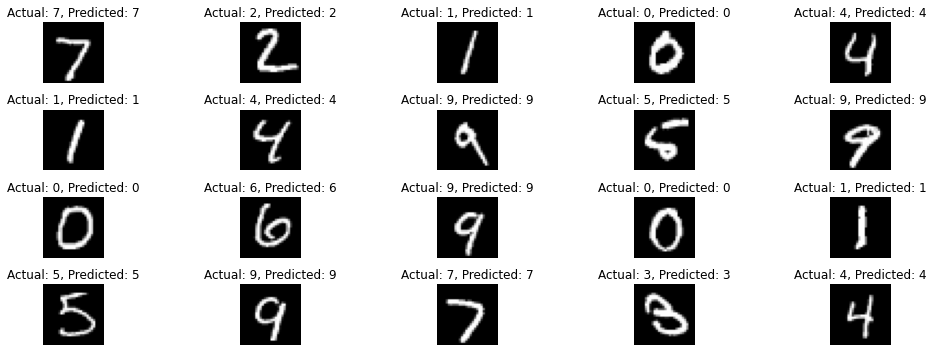

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Number of images to display
num_images = 20

# Create a figure to display the images
plt.figure(figsize=(15, 5))

for i in range(num_images):
    # Take a sample image from the test set
    sample_image = X_test[i]
    sample_label = y_test[i]

    # Reshape the image for the model (28, 28) -> (1, 28, 28)
    sample_image_reshaped = sample_image.reshape(1, 28, 28)

    # Predict the class
    predictions = model.predict(sample_image_reshaped)
    predicted_label = np.argmax(predictions)

    # Print predictions for each image
    print(f"Image {i}: Predictions: {predictions}, Predicted Label: {predicted_label}")

    # Display the sample image and prediction
    plt.subplot(4, 5, i + 1)
    plt.imshow(sample_image, cmap='gray')
    plt.title(f"Actual: {sample_label}, Predicted: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()
